In [51]:
import numpy as np
import matplotlib.pyplot as plt

In [52]:
# move a cartesian robot

# this is an example of how to generate a relative motion on a stepper motor

def s(t, T):
    return 3*np.pow(t/T, 2) - 2*np.pow(t/T, 3)

x_i = np.array([0, 0, 0]) # initial position
x_f = np.array([5, 5, 5]) # final position
prev_x = x_i # previous position

f = 100 # update frequency (Hz) need to lower is is the step are to small 
T = 10 # time of the motion (s)

rev_motor = np.array([0, 0, 0]) # output revolution command for the motors
# convert the motion of the end effector to the revolution of the motors 
ConversionMatrix = np.array([[1, 0, 0],  # Motor 1
                             [0, 1, 0],  # Motor 2
                             [0, 0, 1]]) # Motor 3

cmd_motor = []
motion_end_effector = []

for t in range(1, int(f * T)):

    x = x_i + (x_f - x_i) * s(t, f * T)
    delta_x = x - prev_x

    rev_motor = np.dot(ConversionMatrix, (delta_x))
    speed_motor = np.dot(ConversionMatrix, f *  (delta_x)) # so the update rate is constant

    # revolution (rev) and speed (rev/s)
    cmd_motor.append([rev_motor[0], speed_motor[0]])
    motion_end_effector.append([delta_x[0], f * delta_x[0]])

    print("Motor 1: rev: ", rev_motor[0], "speed: ", speed_motor[0])
    print("End effector: position: ", delta_x[0], " speed : ", f *  (delta_x[0]))

    prev_x = x


Motor 1: rev:  1.499e-05 speed:  0.0014990000000000001
End effector: position:  1.499e-05  speed :  0.0014990000000000001
Motor 1: rev:  4.4930000000000005e-05 speed:  0.0044930000000000005
End effector: position:  4.4930000000000005e-05  speed :  0.0044930000000000005
Motor 1: rev:  7.481e-05 speed:  0.007481
End effector: position:  7.481e-05  speed :  0.007481
Motor 1: rev:  0.00010462999999999998 speed:  0.010462999999999998
End effector: position:  0.00010462999999999998  speed :  0.010462999999999998
Motor 1: rev:  0.00013439000000000002 speed:  0.013439000000000001
End effector: position:  0.00013439000000000002  speed :  0.013439000000000001
Motor 1: rev:  0.00016408999999999993 speed:  0.016408999999999993
End effector: position:  0.00016408999999999993  speed :  0.016408999999999993
Motor 1: rev:  0.00019373000000000014 speed:  0.019373000000000015
End effector: position:  0.00019373000000000014  speed :  0.019373000000000015
Motor 1: rev:  0.00022331 speed:  0.022331
End eff

In [53]:
# convert the relative motion into commands

command_lines = []

for row in cmd_motor:
    
    speed_cmd = f"SPEED x,{row[1] * 60}" # convertion into RPM
    move_cmd = f"MOVE x,{row[0]}"
    
    command_lines.append(speed_cmd)
    command_lines.append(move_cmd)

# Save to file
with open("motor_commands.txt", "w") as f:
    for line in command_lines:
        f.write(line + "\n")

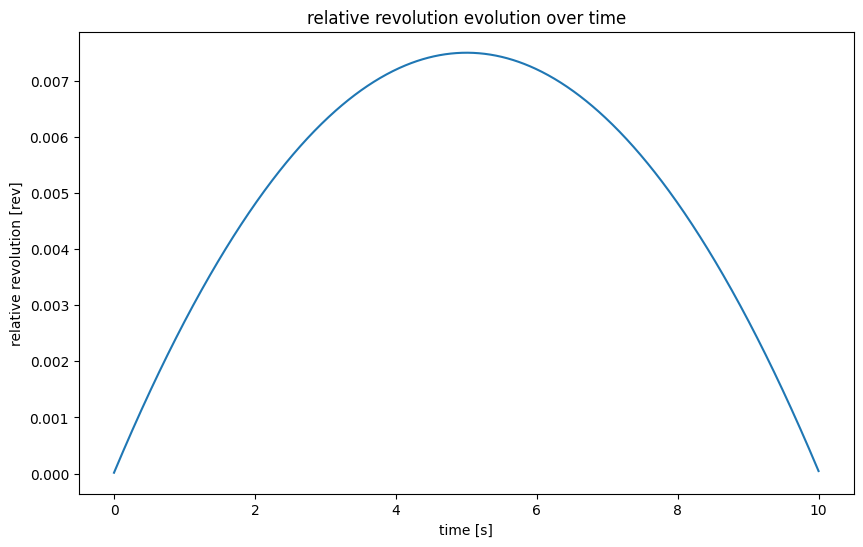

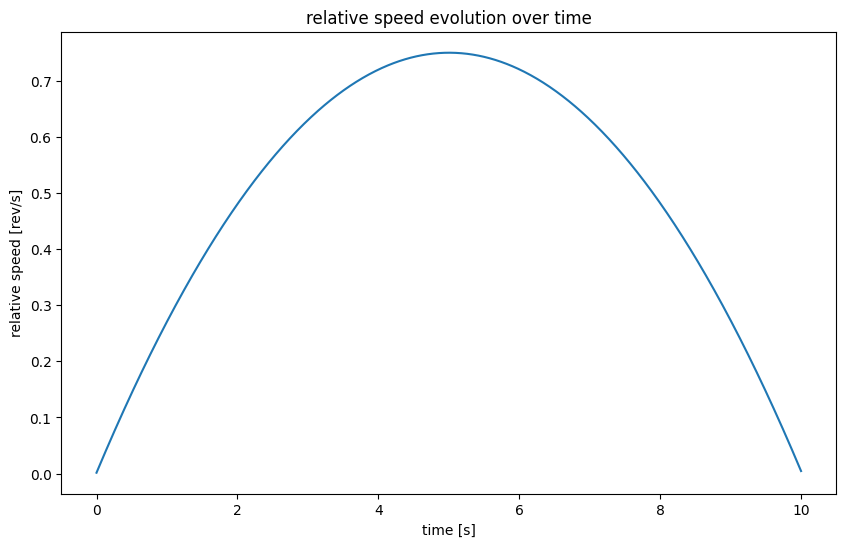

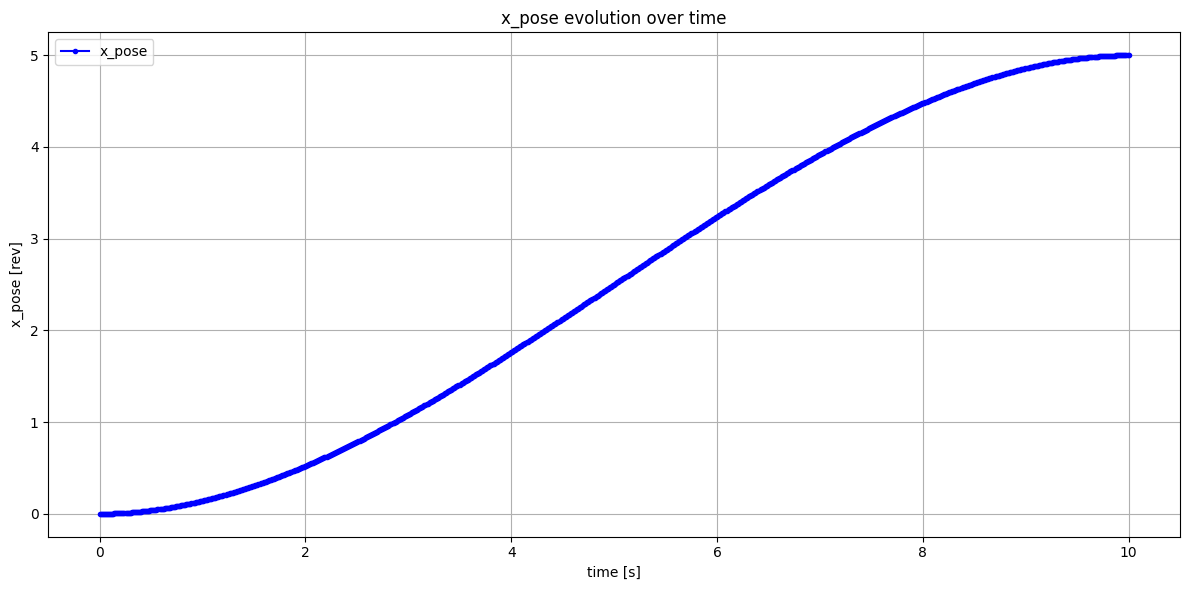

In [54]:
motion_end_effector = np.array(motion_end_effector)

move = motion_end_effector[:, 0]
speed = motion_end_effector[:, 1]

t_values = np.linspace(0, T, len(move))

# plot the relative motion of the end effector
plt.figure(figsize=(10, 6))
plt.plot(t_values, move, label='Position [m]')
plt.xlabel("time [s]")
plt.ylabel("relative revolution [rev]")
plt.title("relative revolution evolution over time")
plt.show()

# plot the speed of the end effector
plt.figure(figsize=(10, 6))
plt.plot(t_values, speed, label='Speed [m/s]')
plt.xlabel("time [s]")
plt.ylabel("relative speed [rev/s]")
plt.title("relative speed evolution over time")
plt.show()

# plot the position steps over time
x_pose = []
prev_move = 0

for i in range(len(move)):
    x_pose.append(move[i] + prev_move)
    prev_move = x_pose[i]

# Plot avec les points
plt.figure(figsize=(12, 6))
plt.plot(t_values, x_pose, 'bo-', markersize=3, label='x_pose')  # 'bo-' = bleu, cercle, ligne
plt.xlabel("time [s]")
plt.ylabel("x_pose [rev]")
plt.title("x_pose evolution over time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()